<a href="https://colab.research.google.com/github/MatheusRobles/Projeto_Pandas/blob/main/Analise_Exploratoria_Amazonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation

Sobre o conjunto de dados Contexto A floresta amazônica é uma floresta tropical úmida de folhas largas no bioma amazônico que cobre o território pertencente a nove nações. A maior parte da floresta está contida no Brasil, com 60% da floresta tropical, seguido pelo Peru com 13%, Colômbia com 10% e com quantidades menores na Venezuela, Equador, Bolívia, Guiana, Suriname e Guiana Francesa.

A região oferece benefícios importantes para as comunidades que vivem perto e longe. Quase 500 comunidades indígenas chamam a floresta amazônica de lar. É um ecossistema altamente biodiverso, lar de inúmeras espécies de plantas e animais. A floresta tropical pode criar seu próprio clima e influenciar climas em todo o mundo. Infelizmente, o frágil ecossistema enfrenta a constante ameaça de desmatamento e incêndios (por causas naturais ou antrópicas).

O desmatamento ocorre por vários motivos, como agricultura ilegal, desastres naturais, urbanização e mineração. Existem várias maneiras de remover florestas - queima e extração de madeira são dois métodos. Embora o desmatamento esteja acontecendo em todo o mundo hoje, é uma questão especialmente crítica na floresta amazônica, como a única grande floresta ainda existente no mundo. Lá, as espécies de plantas e animais que abrigam vêm desaparecendo em ritmo alarmante.

In [50]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Projeto_Pandas/def_area_2004_2019.csv")
df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [51]:
#Grafico desmatamento da amazonia por ano
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Ano/Estados'], y=df['AMZ LEGAL']))
fig.update_layout(title='Desmatamento Amazônia Legal', xaxis_title='Ano', yaxis_title='Área (km²)')
fig.show()

Valores das áreas totais
2004 foi o ano que houve mais desmatamentos da história com um total de 27.772 km²

2005 foi o segundo ano com mais desmatamentos com um total de 19.014 km²

2008 subiu 10% do ano anterior com 12.911 km²

2012 teve o menor índice de desmatamento com 4.571 km²

2019 foi o ano com mais desmatamentos desde 2008, com 9.762 km²

In [53]:
#Adicionando Desmatamento total ao longo dos ano no DF
df['AREA DESM_TOTAL'] = df['AMZ LEGAL'].cumsum()
df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL,AREA DESM_TOTAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014,46786
2,2006,398,788,30,674,4333,5659,2049,231,124,14286,61072
3,2007,184,610,39,631,2678,5526,1611,309,63,11651,72723
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911,85634
5,2009,167,405,70,828,1049,4281,482,121,61,7464,93098
6,2010,259,595,53,712,871,3770,435,256,49,7000,100098
7,2011,280,502,66,396,1120,3008,865,141,40,6418,106516
8,2012,305,523,27,269,757,1741,773,124,52,4571,111087
9,2013,221,583,23,403,1139,2346,932,170,74,5891,116978


In [55]:
#Grafico com o desmatamento total da amazonia
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Ano/Estados'], y=df['AREA DESM_TOTAL'], name='Área desmatada total acumulada'))
fig.update_layout(title='Área desmatada total acumulada na Amazônia Legal (2004-2019)',xaxis_title='Ano', yaxis_title='Área desmatada total acumulada (km²)')
fig.show()

In [58]:
#Grafico com o desmatamento da amazonia por ano de cada estado
estados = ["AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"]
dados = []

# criando traces para cada estado
for i in range(len(estados)):
    trace = go.Scatter(x=df["Ano/Estados"], y=df[estados[i]], name=estados[i])
    dados.append(trace)

fig = go.Figure(data=dados)
fig.update_layout(title='Desmatamento Amazônia Legal', xaxis_title='Ano', yaxis_title='Área (km²)')
fig.show()

In [59]:
#Grafico com o desmatamento da amazonia total de cada estado
total_desmatado = []
for estado in estados:
    total_desmatado.append(df[estado].sum())
trace = go.Bar(x=estados, y=total_desmatado)


layout = go.Layout(title='Total de desmatamento por estado na Amazônia Legal (2004-2019)', xaxis=dict(title='Estado'), yaxis=dict(title='Área desmatada total (km²)'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [103]:
df_agro = pd.read_csv("/content/Projeto_Pandas/Tabela_IBGE_SIDRA_AGRO_plantacao_por_hec.csv")
df_agro

,Local/Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brasil,56662542,57964209,56069983,55887379,59032241,59431710,59059599,61841033,63030377,66406024,70398423,71028134,71432966,73644898,73274337,75898382
1,Rondônia,351157,386252,393201,383553,408939,436766,455482,546051,476280,447793,465183,505753,512621,585246,571287,657037
2,Acre,115864,117634,111638,107877,98425,84700,114815,121043,135180,118489,110554,103290,94552,87101,72431,69230
3,Amazonas,129033,164876,162948,144985,139022,140167,135465,146031,145647,135550,113173,100318,101189,103168,96226,99489
4,Roraima,59853,57923,54698,41908,46133,34833,34890,42135,43508,49804,47814,50600,52194,47578,66490,71665
5,Pará,1028444,1061815,983007,950688,894926,859286,793733,795974,818833,888463,953116,1015293,1067313,1198721,1157851,1230181
6,Amapá,13056,14734,14309,15656,18463,20498,22341,22076,20925,24280,39384,30878,34078,38863,34238,34800
7,Tocantins,541537,687118,596696,583585,646558,612324,664195,705878,730965,834257,1034697,1199494,1227972,1278462,1348373,1413461
8,Maranhão,1520015,1605736,1608870,1620345,1629185,1588862,1729552,1751843,1795760,1845490,1975258,1802598,1571680,1783013,1796133,1701124
9,Piauí,920826,991698,1004273,1021277,1015856,1091208,1085916,1211926,1242537,1367561,1443676,1468590,1407874,1550591,1571380,1565546


In [102]:
df_pecuaria = pd.read_csv("/content/Projeto_Pandas/Tabela_IBGE_SIDRA_PECUARIA_efetivo_dos_rebanhos_bovinhos.csv")
df_pecuaria

,Local/Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brasil,204512737,207156696,205886244,199752014,202306731,205307954,209541109,212815311,211279082,211764292,212366132,215220508,218190768,215003578,213809445,214689984
1,Rondônia,10671440,11349452,11484162,11007613,11176201,11532891,11842073,12182259,12218437,12329971,12744326,13397970,13682200,14091378,14367161,14349219
2,Acre,2062690,2313185,2452915,2315798,2425687,2511285,2578460,2549497,2634467,2697489,2799673,2916207,2998969,2895028,3303633,3509682
3,Amazonas,1156723,1197171,1243358,1208652,1312352,1350816,1360800,1439597,1445739,1470537,1405208,1293325,1315821,1343574,1376210,1455842
4,Roraima,459000,507000,508600,481100,476200,475380,577050,651511,686491,747045,735962,794783,780877,787318,817198,879007
5,Pará,17430496,18063669,17501678,15353989,16240697,16856561,17633339,18262547,18605051,19165028,19911217,20271618,20476783,20585367,20628651,20953429
6,Amapá,82243,96599,109081,103170,95803,104977,114773,127499,142825,154967,167529,89682,76379,66921,55422,54296
7,Tocantins,7924546,7961926,7760590,7395450,7392515,7605249,7994200,8025400,8082336,8140580,8062227,8412404,8652161,8738477,8352513,8480724
8,Maranhão,5928131,6448948,6613270,6609438,6816338,6885265,6979844,7264106,7490942,7611324,7758352,7643128,7653870,7687695,7793180,8008643
9,Piauí,1830613,1826833,1838378,1736520,1750910,1682111,1679957,1688024,1689926,1666107,1660099,1649549,1639856,1625006,1464196,1447817


In [107]:
estados_Amazonia = ["Acre", "Amazonas", "Amapá", "Maranhão", "Mato Grosso", "Pará", "Rondônia", "Roraima", "Tocantins"]
df_agro = df_agro.loc[df_agro["Local/Ano"].isin(estados_Amazonia)]
df_agro

,Local/Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Rondônia,351157,386252,393201,383553,408939,436766,455482,546051,476280,447793,465183,505753,512621,585246,571287,657037
2,Acre,115864,117634,111638,107877,98425,84700,114815,121043,135180,118489,110554,103290,94552,87101,72431,69230
3,Amazonas,129033,164876,162948,144985,139022,140167,135465,146031,145647,135550,113173,100318,101189,103168,96226,99489
4,Roraima,59853,57923,54698,41908,46133,34833,34890,42135,43508,49804,47814,50600,52194,47578,66490,71665
5,Pará,1028444,1061815,983007,950688,894926,859286,793733,795974,818833,888463,953116,1015293,1067313,1198721,1157851,1230181
6,Amapá,13056,14734,14309,15656,18463,20498,22341,22076,20925,24280,39384,30878,34078,38863,34238,34800
7,Tocantins,541537,687118,596696,583585,646558,612324,664195,705878,730965,834257,1034697,1199494,1227972,1278462,1348373,1413461
8,Maranhão,1520015,1605736,1608870,1620345,1629185,1588862,1729552,1751843,1795760,1845490,1975258,1802598,1571680,1783013,1796133,1701124
26,Mato Grosso,7912796,8976694,8009276,7992055,8830550,8735355,9381244,9884223,11262263,12723490,13542011,14082687,14494519,15570194,15478806,16594186


In [109]:
estados_Amazonia = ["Acre", "Amazonas", "Amapá", "Maranhão", "Mato Grosso", "Pará", "Rondônia", "Roraima", "Tocantins"]
df_pecuaria = df_pecuaria.loc[df_pecuaria["Local/Ano"].isin(estados_Amazonia)]
df_pecuaria

,Local/Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Rondônia,10671440,11349452,11484162,11007613,11176201,11532891,11842073,12182259,12218437,12329971,12744326,13397970,13682200,14091378,14367161,14349219
2,Acre,2062690,2313185,2452915,2315798,2425687,2511285,2578460,2549497,2634467,2697489,2799673,2916207,2998969,2895028,3303633,3509682
3,Amazonas,1156723,1197171,1243358,1208652,1312352,1350816,1360800,1439597,1445739,1470537,1405208,1293325,1315821,1343574,1376210,1455842
4,Roraima,459000,507000,508600,481100,476200,475380,577050,651511,686491,747045,735962,794783,780877,787318,817198,879007
5,Pará,17430496,18063669,17501678,15353989,16240697,16856561,17633339,18262547,18605051,19165028,19911217,20271618,20476783,20585367,20628651,20953429
6,Amapá,82243,96599,109081,103170,95803,104977,114773,127499,142825,154967,167529,89682,76379,66921,55422,54296
7,Tocantins,7924546,7961926,7760590,7395450,7392515,7605249,7994200,8025400,8082336,8140580,8062227,8412404,8652161,8738477,8352513,8480724
8,Maranhão,5928131,6448948,6613270,6609438,6816338,6885265,6979844,7264106,7490942,7611324,7758352,7643128,7653870,7687695,7793180,8008643
26,Mato Grosso,25918998,26651500,26064332,25683031,26018216,27357089,28757438,29265718,28740802,28395205,28592183,29364042,30296096,29725378,30199598,31654882


In [112]:
#aqui encontrei essa solução para tranformar todos os valores numeros da tabela em float
num_cols = df_agro.columns[1:]

# convertendo as strings para valores numéricos
df_agro[num_cols] = df_agro[num_cols].apply(pd.to_numeric)

num_cols = df_pecuaria.columns[1:]

# convertendo as strings para valores numéricos
df_pecuaria[num_cols] = df_pecuaria[num_cols].apply(pd.to_numeric)

In [110]:
df_estados = df_agro.drop(index=8)
fig = go.Figure()
for i in range(len(df_estados)):
    estado = df_estados.iloc[i, 0]
    valores = df_estados.iloc[i, 1:]
    fig.add_trace(go.Scatter(x=valores.index, y=valores.values, mode='lines', name=estado))

fig.update_layout(title='Evolução do Valor do Agronegócio por Ano',
                  xaxis_title='Ano',
                  yaxis_title='Valor')

fig.show()

In [111]:
df_estados2 = df_pecuaria.drop(index=8)
fig = go.Figure()
for i in range(len(df_estados2)):
    estado = df_estados2.iloc[i, 0]
    valores = df_estados2.iloc[i, 1:]
    fig.add_trace(go.Scatter(x=valores.index, y=valores.values, mode='lines', name=estado))

fig.update_layout(title='Evolução do Efetivo de rebanhos pecuarios por Ano',
                  xaxis_title='Ano',
                  yaxis_title='Valor')

fig.show()

Fica a Conclusão que a Agropecuaria influencia diretamente no desmatamento da Amazonia mas não é o unico fator, já que o MT possui indices absurdamente maiores que o PA e mesmo assim o PA lidera no rank de maior desmatamento da Amazonia.

Encontrar dados com informação da população de especies da amazonia ao decorrer dos anos e avaliar mudanças, ver o impacto de criação de orgs ou qualquer outra forma de prevenção dos animais e avaliar o impacto.

##### DB Mapa de Calor

In [ ]:
df2 = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
df2

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


Adicionando a coluna com a região de cada estado, para analisar os focos por regiões

In [ ]:
#dicionário estados - região
regioes = {'ACRE': 'Norte',
 'ALAGOAS': 'Nordeste',
 'AMAPA': 'Norte',
 'AMAZONAS': 'Norte',
 'BAHIA': 'Nordeste',
 'CEARA': 'Nordeste',
 'DISTRITO FEDERAL': 'Centro-Oeste',
 'ESPIRITO SANTO': 'Sudeste',
 'GOIAS': 'Centro-Oeste',
 'MARANHAO': 'Nordeste',
 'MATO GROSSO': 'Centro-Oeste',
 'MATO GROSSO DO SUL': 'Centro-Oeste',
 'MINAS GERAIS': 'Sudeste',
 'PARA': 'Norte',
 'PARAIBA': 'Nordeste',
 'PARANA': 'Sul',
 'PERNAMBUCO': 'Nordeste',
 'PIAUI': 'Nordeste',
 'RIO DE JANEIRO': 'Sudeste',
 'RIO GRANDE DO NORTE': 'Nordeste',
 'RIO GRANDE DO SUL': 'Sul',
 'RONDONIA': 'Norte',
 'RORAIMA': 'Norte',
 'SANTA CATARINA': 'Sul',
 'SAO PAULO': 'Sudeste',
 'SERGIPE': 'Nordeste',
 'TOCANTINS': 'Norte'}

In [ ]:
#criando uma nova coluna
df2['region'] = df2['state']
df2['region'].replace(regioes,inplace=True)
df2

,year,month,state,latitude,longitude,firespots,region
0,1999,1,AMAZONAS,-2.371113,-59.899933,3,Norte
1,1999,1,MARANHAO,-2.257395,-45.487831,36,Nordeste
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18,Centro-Oeste
3,1999,1,PARA,-2.474820,-48.546967,87,Norte
4,1999,1,RONDONIA,-12.861700,-60.513100,1,Norte
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148,Centro-Oeste
2100,2019,12,PARA,-2.976727,-50.909316,1280,Norte
2101,2019,12,RONDONIA,-10.809262,-62.890452,42,Norte
2102,2019,12,RORAIMA,2.856667,-60.431963,27,Norte


In [ ]:
# verificando valores nulos em cada coluna
df2.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
region       0
dtype: int64

<Axes: title={'center': 'Focos de Incêndio - 1999 a 2019'}, xlabel='Região', ylabel='Quantidade'>

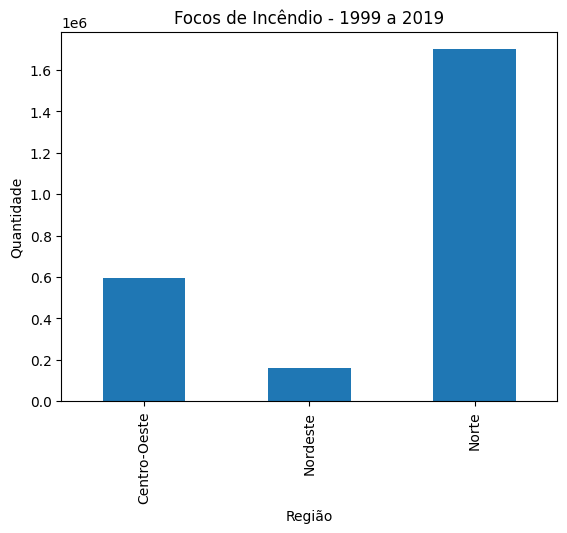

In [ ]:
#rever como escala do y aparece aqui
df2.groupby('region')['firespots'].sum().plot(kind='bar',xlabel='Região',ylabel='Quantidade',title='Focos de Incêndio - 1999 a 2019')

<Axes: title={'center': 'Focos de Incêndio - 1999 a 2019'}, ylabel='Quantidade'>

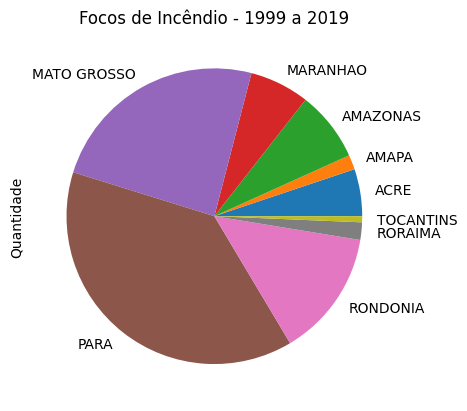

In [ ]:
df2.groupby('state')['firespots'].sum().plot(kind='pie',xlabel='Estado',ylabel='Quantidade',title='Focos de Incêndio - 1999 a 2019')

In [ ]:
# porcentagem de focos no Para em comparação com o total
firespots_para = df2.loc[df2['state']=='PARA','firespots'].sum()
firespots_mt = df2.loc[df2['state']=='MATO GROSSO','firespots'].sum()
firespots_total = df2['firespots'].sum()
perc_pa = firespots_para/firespots_total * 100
perc_pa_mt = (firespots_para+firespots_mt)/firespots_total * 100
perc_pa, perc_pa_mt

(38.36271352188929, 62.6020510152277)

<Axes: title={'center': 'Focos de Incêndio Brasil - 1999 a 2019'}, xlabel='Ano', ylabel='Quantidade'>

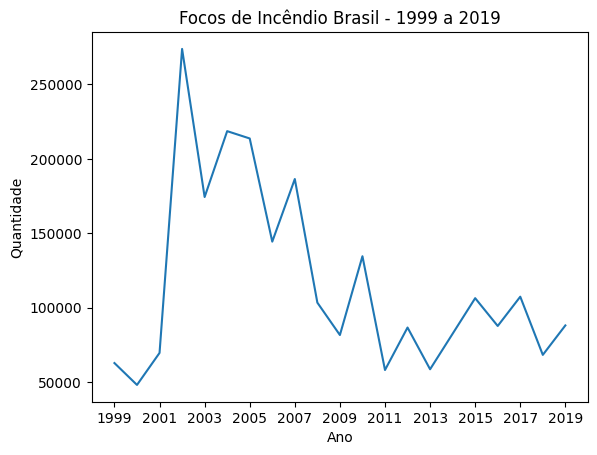

In [ ]:
df2.groupby('year')['firespots'].sum().plot(kind='line',xlabel='Ano',ylabel='Quantidade',title='Focos de Incêndio Brasil - 1999 a 2019',
                                            xticks=[x for x in range(1999,2020,2)])

<Axes: title={'center': 'Focos de Incêndio por mês - 1999 a 2019'}, xlabel='Mês', ylabel='Quantidade'>

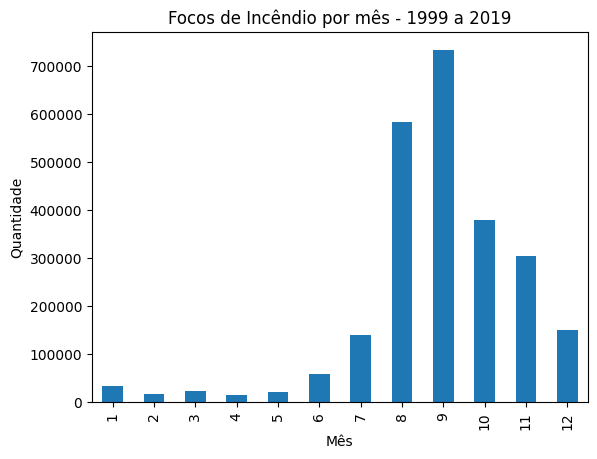

In [ ]:
df2.groupby('month')['firespots'].sum().plot(kind='bar',xlabel='Mês',ylabel='Quantidade',title='Focos de Incêndio por mês - 1999 a 2019')

<Axes: title={'center': 'Focos de Incêndio no Pará - 1999 a 2019'}, xlabel='Ano', ylabel='Quantidade'>

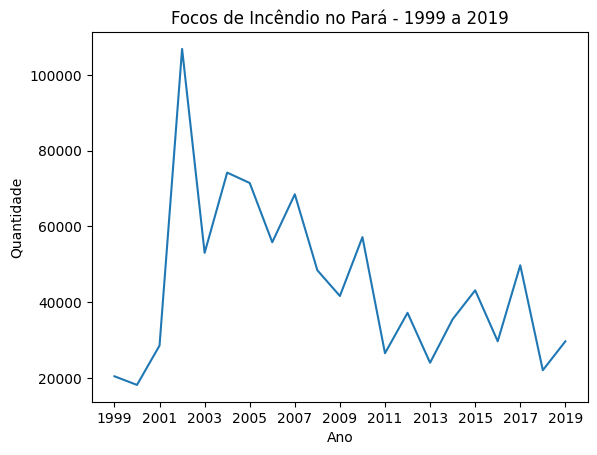

In [ ]:
firespots_para = df2.loc[df2['state']=='PARA',['year','firespots']]
firespots_para.groupby('year')['firespots'].sum().plot(kind='line', xlabel='Ano',ylabel='Quantidade',
                                                       title='Focos de Incêndio no Pará - 1999 a 2019',xticks=[x for x in range(1999,2020,2)])

**insights análise segunda database:**
- a maior quantia de focos de incêndio acontecem na região norte do país (principalmente Para, que representa 38,36%)
- juntos, Para e Mato Grosso representam 62% de todos focos de incendio do país (de1999 a 2019)
- de 2002 a 2008 foram os anos com mais incidência de focos de incêndio
- 2000, 2011 e 2013 apresentam as menores quantidades totais de focos de incêndio
- o período do ano que mais costumam acontecer as queimadas inicia em Julho e vai até Dezembro, com destaque para Agosto e Setembro
- quanto ao estado do Para, teve altas incidências no período de 2002 a 2007, apresentando uma queda após período


In [ ]:
df3 = pd.read_clipboard()
df3

,Estado,Percentual de agropecuária do estado em relação ao país
0,Acre,"0,28%"
1,Alagoas,"0,72%"
2,Amapá,"0,08%"
3,Amazonas,"1,32%"
4,Bahia,"6,51%"
5,Ceará,"1,17%"
6,Distrito Federal,"0,04%"
7,Espírito Santo,"0,63%"
8,Goiás,"8,47%"
9,Maranhão,"2,50%"
